In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
sonar_data = pd.read_csv('sonar_csv.csv')
sonar_data.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


In [7]:
sonar_data.describe().T

,count,mean,std,min,25%,50%,75%,max
attribute_1,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
attribute_2,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
attribute_3,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
attribute_4,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
attribute_5,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
attribute_6,208.0,0.104570,0.059105,0.0102,0.067025,0.09215,0.134125,0.3823
attribute_7,208.0,0.121747,0.061788,0.0033,0.080900,0.10695,0.154000,0.3729
attribute_8,208.0,0.134799,0.085152,0.0055,0.080425,0.11210,0.169600,0.4590
attribute_9,208.0,0.178003,0.118387,0.0075,0.097025,0.15225,0.233425,0.6828
attribute_10,208.0,0.208259,0.134416,0.0113,0.111275,0.18240,0.268700,0.7106


In [10]:
sonar_data['Class'].value_counts()

Mine    111
Rock     97
Name: Class, dtype: int64

In [12]:
sonar_data.groupby('Class').mean()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
Class,,,,,,,,,,,,,,,,,,,,,
Mine,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
Rock,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [13]:
x = sonar_data.drop(columns='Class', axis=1)
y = sonar_data['Class']

In [15]:
y.head()

0    Rock
1    Rock
2    Rock
3    Rock
4    Rock
Name: Class, dtype: object

In [17]:
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)
x_train.shape

(166, 60)

In [18]:
model = LogisticRegression()
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.8373493975903614

In [19]:
pred = model.predict(x_test)
accuracy = accuracy_score(pred,y_test)
accuracy

0.7857142857142857

In [22]:
input_data = (0.0762,0.0666,0.0481,0.0394,0.059,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.573,0.5399,0.3161,0.2285,0.6995,1,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.243,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.023,0.0046,0.0156,0.0031,0.0054,0.0105,0.011,0.0015,0.0072,0.0048,0.0107,0.0094
)

input_data_as_array = np.array(input_data)
input_data_reshape = input_data_as_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
prediction

array(['Rock'], dtype=object)

In [23]:
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(x_train,y_train)
model_svm.score(x_train,y_train)

0.927710843373494

In [24]:
predo = model_svm.predict(x_test)
accuracysvm = accuracy_score(predo, y_test)
accuracysvm

0.8333333333333334

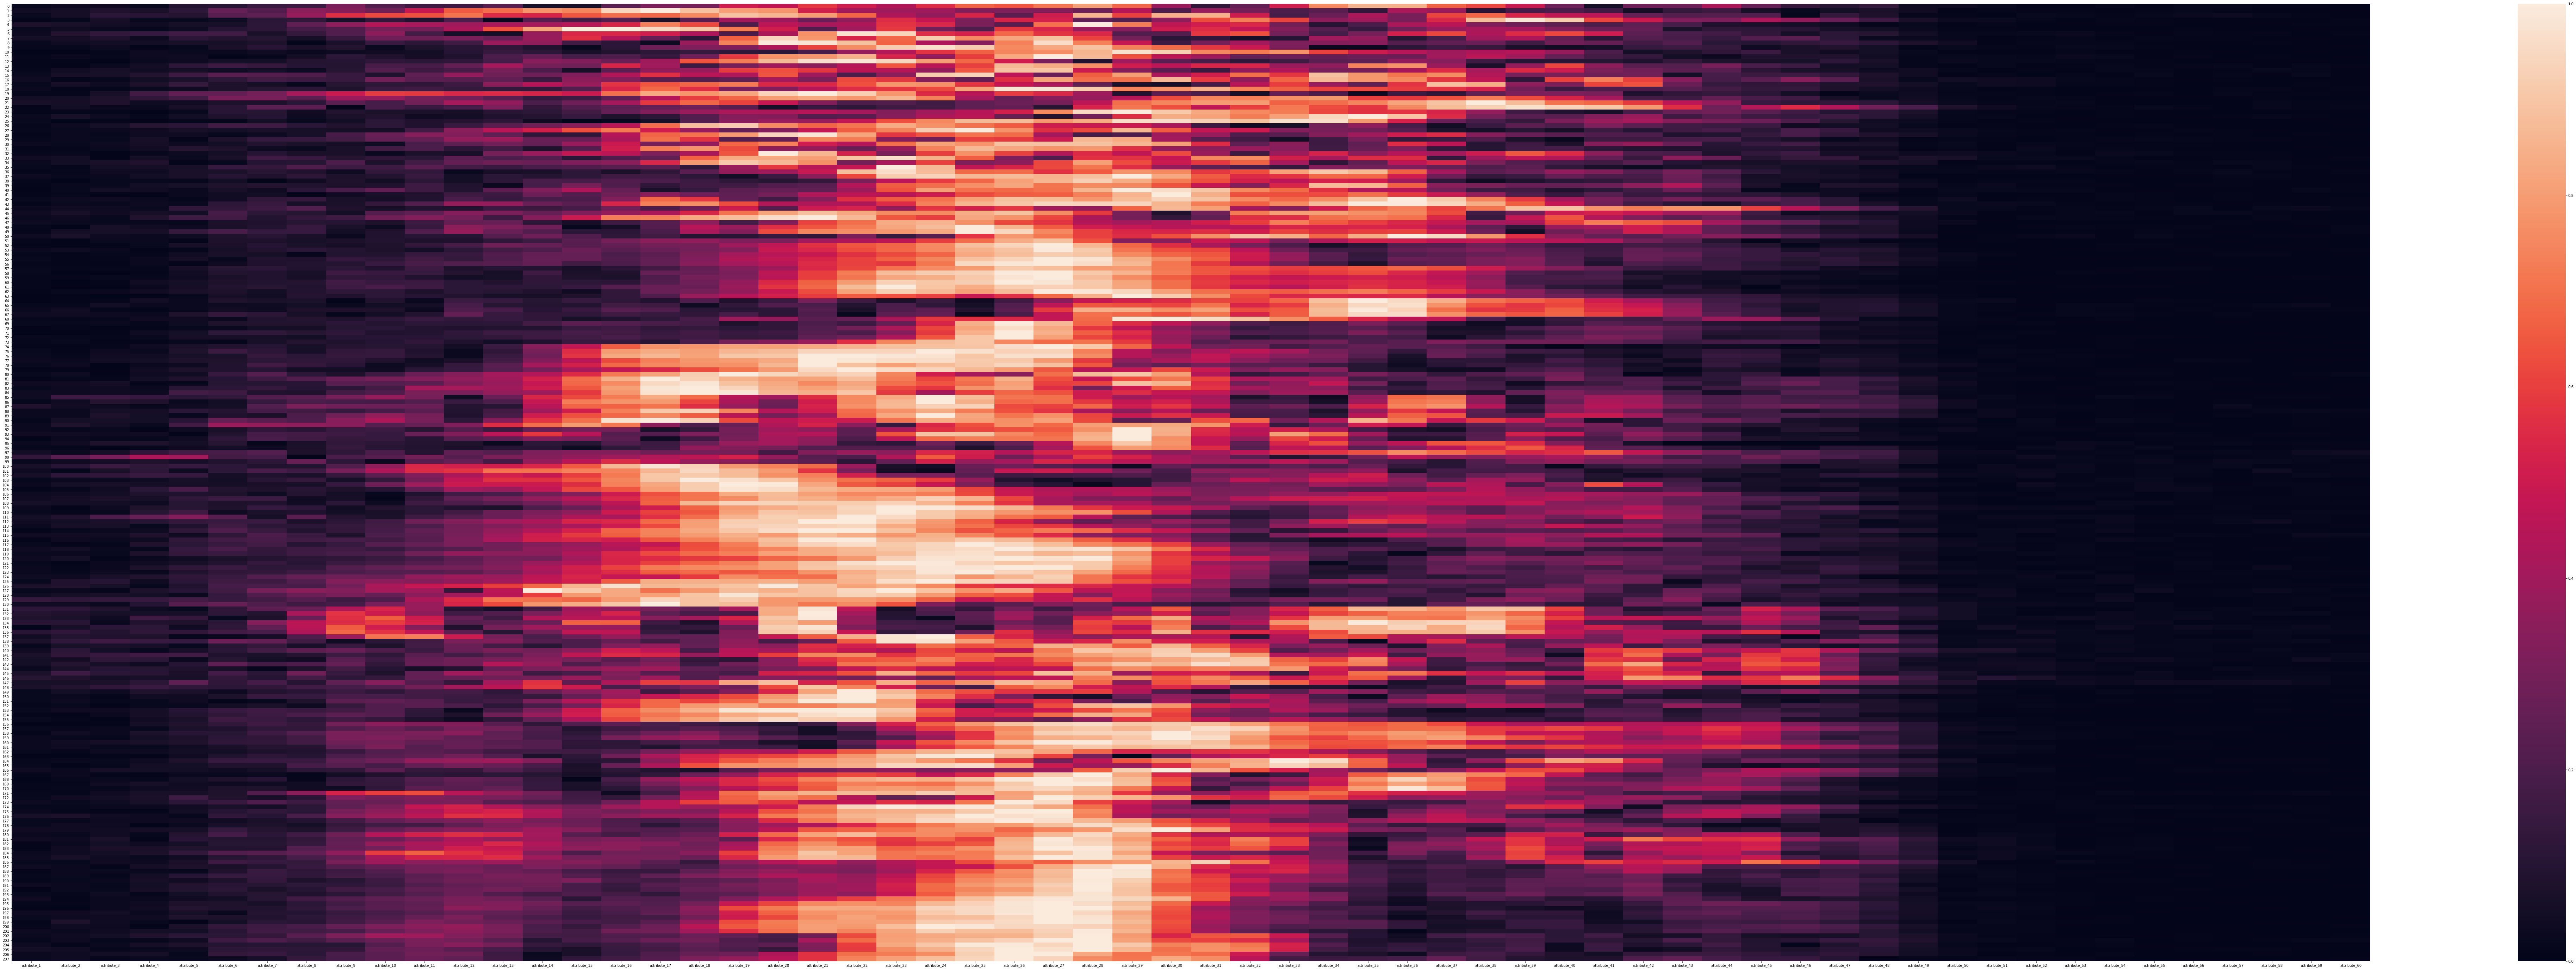

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(150,50))
hm = sns.heatmap(sonar_data.drop(columns='Class', axis=1))
plt.show()

In [34]:
print(sonar_data.corr())

              attribute_1  attribute_2  attribute_3  attribute_4  attribute_5  \
attribute_1      1.000000     0.735896     0.571537     0.491438     0.344797   
attribute_2      0.735896     1.000000     0.779916     0.606684     0.419669   
attribute_3      0.571537     0.779916     1.000000     0.781786     0.546141   
attribute_4      0.491438     0.606684     0.781786     1.000000     0.726943   
attribute_5      0.344797     0.419669     0.546141     0.726943     1.000000   
attribute_6      0.238921     0.332329     0.346275     0.352805     0.597053   
attribute_7      0.260815     0.279040     0.190434     0.246440     0.335422   
attribute_8      0.355523     0.334615     0.237884     0.246742     0.204006   
attribute_9      0.353420     0.316733     0.252691     0.247078     0.177906   
attribute_10     0.318276     0.270782     0.219637     0.237769     0.183219   
attribute_11     0.344058     0.297065     0.274610     0.271881     0.231684   
attribute_12     0.210861   